### Lath Essoh

# 1.KNN

In [5]:
!pip install mglearn

  Obtaining dependency information for mglearn from https://files.pythonhosted.org/packages/bb/8b/687d30a3df6b870af541dde6327423e35713e38243db135f57b4ebd054f3/mglearn-0.2.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 2.6 MB/s eta 0:00:0000:0100:01


In [6]:
import sys
sys.path.append("..")    

import numpy as np
import mglearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


# In[ ]: *** Classification ****

# Create a simulated training and test set
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# QUESTION: What is the dataset proportion used for the test set?  Can it be changed with some options?

Le pourcentage de données utilisées pour le jeu de test dans le code est déterminé par la fonction train_test_split de scikit-learn. Par défaut, cette fonction utilise 25% des données pour le jeu de test, sauf si tu spécifies une autre valeur à l'aide du paramètre test_size.

Pour changer cette proportion :
On peut modifier la taille du jeu de test en précisant l'option test_size dans la fonction train_test_split. Par exemple, si l'on veut utiliser 30% des données pour le test :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

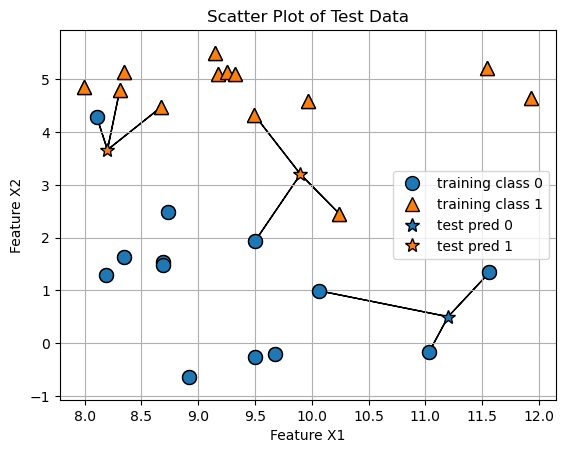

In [9]:
# Plot the training data
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.grid(True)
plt.title('Scatter Plot of Training Data')
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

# Plot the test data
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test)
plt.grid(True)
plt.title('Scatter Plot of Test Data')
plt.legend(['Class 0', 'Class 1'], loc=4)
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

# Instantiate the model   
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the model using the training set 
knn.fit(X_train, y_train)

# See what is going on when k=1
mglearn.plots.plot_knn_classification(n_neighbors=3)

# QUESTION: What happens if you increase the number of neighbors to 3?

Si on augmente le nombre de voisins (par exemple, de 1 à 3) dans le modèle KNN, voici ce qui se passe :

Décision plus stable :

Quand on utilise k=1, chaque point est classé en fonction de son plus proche voisin, ce qui peut rendre le modèle plus sensible au bruit. En augmentant à k=3, on prend en compte les 3 voisins les plus proches, ce qui rend les décisions plus robustes et moins sensibles aux points isolés.
Zone de décision plus lissée :

Si on augmente k, la frontière entre les classes devient plus lissée. Plutôt que de se baser uniquement sur un voisin (comme avec k=1), on classe un point selon la majorité des voisins, ce qui crée des zones de décision moins strictes.
Réduction du risque de surapprentissage :

Avec k=1, on risque de surapprendre les données d'entraînement, c'est-à-dire qu'on s'adapte trop aux détails spécifiques. En augmentant k, on réduit ce risque, car on base les décisions sur plusieurs voisins, ce qui capture une tendance plus générale des données.
Compromis biais-variance :

Quand on augmente le nombre de voisins, on introduit plus de biais, car on lisse les frontières de décision. Cela réduit la variance, ce qui améliore souvent la performance sur de nouvelles données, mais on peut perdre en précision sur les données d'entraînement.
En testant avec k=3, on peut observer une différence dans la forme des frontières de décision, qui seront plus lissées par rapport à k=1.

In [16]:
# Make prediction on the test set
knn.predict(X_test)
y_pred = knn.predict(X_test)

# Make prediction on specified values (X1=8; X2=2)
knn.predict([[8, 2]])

# Check the performance of the model
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Classifier performance: \n', classification_report(y_test, y_pred, digits=3))

Confusion matrix: 
 [[3 0]
 [1 3]]
Classifier performance: 
               precision    recall  f1-score   support

           0      0.750     1.000     0.857         3
           1      1.000     0.750     0.857         4

    accuracy                          0.857         7
   macro avg      0.875     0.875     0.857         7
weighted avg      0.893     0.857     0.857         7



# QUESTION: What can you conclude by looking at the confusion matrix?

En regardant la matrice de confusion et les résultats de performance, voici ce qu'on peut conclure :

La matrice indique qu'on a 3 vrais positifs pour la classe 0 (c'est-à-dire que 3 instances de la classe 0 ont été correctement prédites comme étant de la classe 0).
On a 3 vrais positifs pour la classe 1 (3 instances de la classe 1 ont été correctement prédites comme étant de la classe 1).
1 faux négatif : Une instance de la classe 1 a été incorrectement classée comme appartenant à la classe 0.
Il n'y a pas de faux positifs.
2. Interprétation des métriques :
Précision (precision) :

Pour la classe 0, on a une précision de 0.750, ce qui signifie que 75% des prédictions pour la classe 0 sont correctes.
Pour la classe 1, la précision est de 1.000, donc toutes les prédictions pour la classe 1 sont correctes.
Rappel (recall) :

Le rappel de la classe 0 est de 1.000, cela signifie que toutes les instances de la classe 0 ont été correctement prédites.
Pour la classe 1, le rappel est de 0.750, indiquant que 75% des instances de la classe 1 ont été correctement prédites.
F1-score :

Le F1-score est de 0.857 pour les deux classes, ce qui montre un bon équilibre entre précision et rappel.
Exactitude globale (accuracy) :

Le modèle a une exactitude globale de 85.7% (6 prédictions correctes sur 7).
3. Conclusion :
Le modèle montre une bonne performance générale avec une précision et un rappel élevés, surtout pour la classe 0 (100% de rappel).
Le modèle a fait une seule erreur en classant une instance de la classe 1 comme étant de la classe 0, mais aucune autre erreur n'a été commise.
Cependant, on observe un léger déséquilibre dans la capacité du modèle à prédire correctement toutes les instances de la classe 1 (rappel de 75% pour la classe 1).
En résumé, le modèle est globalement fiable, mais on pourrait améliorer la prédiction pour la classe 1 en ajustant certains paramètres comme le nombre de voisins ou en explorant des alternatives comme la normalisation des données.

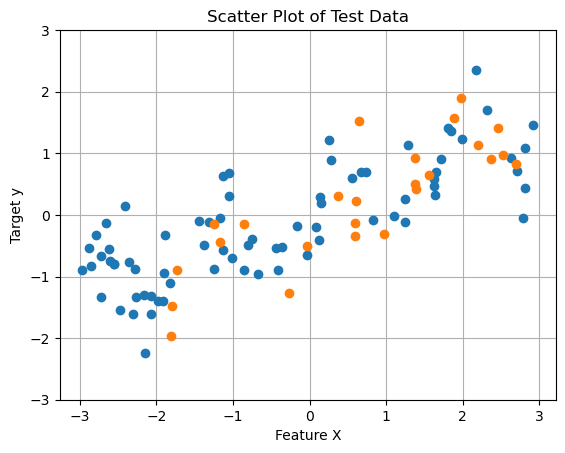

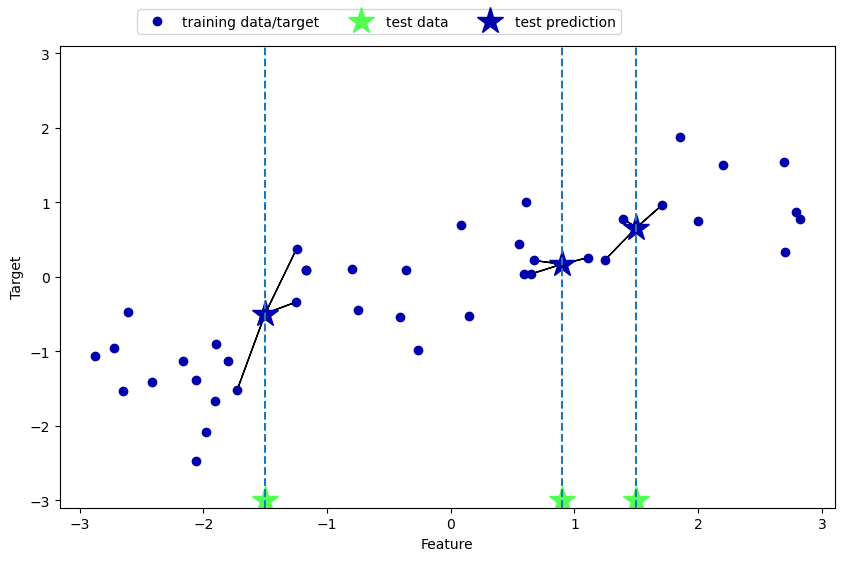

In [20]:
# In[ ]: *** Regression ****

# Simulated dataset for regression task
X, y = mglearn.datasets.make_wave(n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Plot the training data
plt.plot(X_train, y_train, 'o')
plt.ylim(-3, 3)
plt.grid(True)
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')

# Plot the test data
plt.plot(X_test, y_test, 'o')
plt.ylim(-3, 3)
plt.grid(True)
plt.title('Scatter Plot of Test Data')
plt.xlabel('Feature X')
plt.ylabel('Target y')

# Instantiate the model
knnreg = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training set 
knnreg.fit(X_train, y_train)

# See what is going on when k=1
mglearn.plots.plot_knn_regression(n_neighbors=3)

# QUESTION: Explain the plot in a few words? How is prediction obtained for a test observation?

Le graphique montre la relation entre la variable d'entrée (Feature X) et la variable cible (Target y). Les points représentent les données d'entraînement et de test, où chaque point correspond à une observation avec ses valeurs de caractéristiques et sa valeur cible.

La prédiction pour un point de test est obtenue en prenant la moyenne des valeurs cibles des k voisins les plus proches de ce point dans l'ensemble d'entraînement.

Le modèle : 
- Identifie les k voisins les plus proches de cette observation parmi les points d'entraînement.
- Calcule la moyenne des valeurs cibles (y) de ces voisins.
- Utilise cette moyenne comme la prédiction pour la valeur cible de l'observation de test.

Dans notre cas, avec k=3, pour chaque point de test, le modèle regarde les 3 points les plus proches dans l'ensemble d'entraînement et prédit la moyenne de leurs valeurs cibles. Cela donne des prédictions plus lissées qu'avec k=1, où chaque prédiction serait simplement la valeur cible du voisin le plus proche.

In [25]:
# Make prediction on the test set
knnreg.predict(X_test)
y_pred = knnreg.predict(X_test)

# Make prediction on a new observation (X=2.5)
knnreg.predict([[2.5]])

# Check the performance of the model
print('R2 score (training): %.2f' % r2_score(y_train, knnreg.predict(X_train)),
      'R2 score (test) %.2f' % r2_score(y_test, y_pred),
      'MSE (training): %.2f' % mean_squared_error(y_train, knnreg.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, y_pred), sep='\n')

# In[ ]: *** Selecting the optimal value of K with `GridSearchCV()` ****

# Define the range of k values to test
param_grid = {'n_neighbors': np.arange(1, 21)}

# Initiate the model and GridSearchCV with return_train_score=True
knn_gscv = GridSearchCV(KNeighborsRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

R2 score (training): 0.84
R2 score (test) 0.67
MSE (training): 0.13
MSE (test): 0.31


# *** QUESTION: How many models will be estimated in total?

Le nombre total de modèles qui seront estimés lors de l'utilisation de `GridSearchCV()` dépend du nombre de valeurs de `k` que tu testes et du nombre de folds de validation croisée (ici, c'est 10 avec `cv=10`).

### Explication :
- Le paramètre `n_neighbors` a une plage de valeurs allant de 1 à 20, ce qui signifie qu'il y a **20 valeurs différentes** de `k` à tester.
- Avec **10-fold validation croisée** (`cv=10`), pour chaque valeur de `k`, le modèle est entraîné et testé 10 fois, car les données sont divisées en 10 sous-ensembles.

### Calcul du nombre total de modèles :
Le nombre total de modèles estimés est donné par :
Nombre total de modeles=(nombre de valeurs de k)×(nombre de folds CV)

Dans notre cas :
Nombre total de modèles =20×10=200


### Conclusion :
En tout, **200 modèles** seront estimés lors de l'utilisation de `GridSearchCV()` avec ces paramètres.


Best parameters found:  {'n_neighbors': 10}


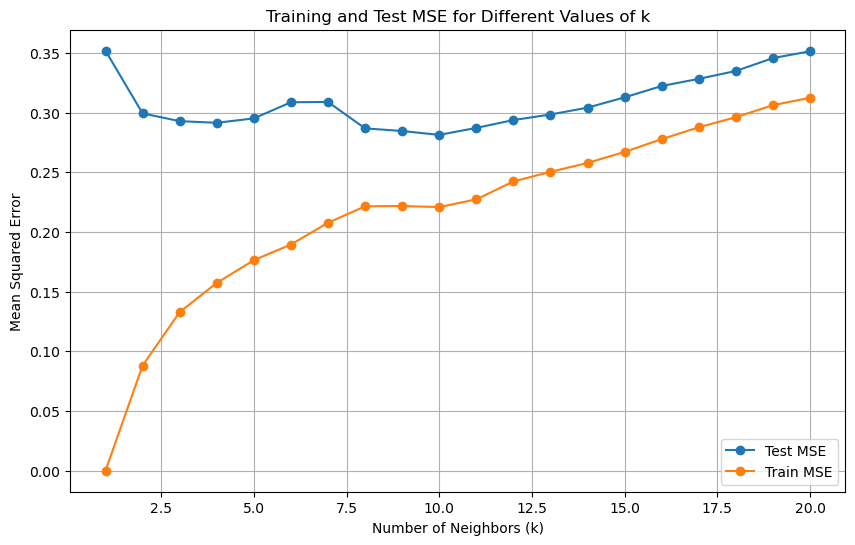

In [27]:
# Fit the model on the training set 
knn_gscv.fit(X_train, y_train)

# Get the best parameter k 
best_params = knn_gscv.best_params_
print('Best parameters found: ', best_params)

# Extract mean squared errors for each value of k
results = knn_gscv.cv_results_
mean_test_scores = -results['mean_test_score']    # Convert from negative MSE
mean_train_scores = -results['mean_train_score']  # Convert from negative MSE

# Plot training and test MSE
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_test_scores, label='Test MSE', marker='o')
plt.plot(param_grid['n_neighbors'], mean_train_scores, label='Train MSE', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test MSE for Different Values of k')
plt.legend()
plt.grid(True)
plt.show()

# QUESTION: Which value of k leads to the lowest bias?

Le biais est le plus faible pour les petites valeurs de k, probablement autour de k=1 ou k=2. Cependant, pour éviter le surapprentissage et obtenir un compromis entre biais et variance, la validation croisée a trouvé que k=10 offre le meilleur équilibre, car il minimise l'erreur sur l'ensemble de test tout en évitant une variance trop élevée.

In [34]:
# Check performance of the best model found by GridSearchCV
best_knnreg = knn_gscv.best_estimator_
y_test_pred = best_knnreg.predict(X_test)
print('MSE (test) for best model: %.2f' % mean_squared_error(y_test, y_test_pred))

MSE (test) for best model: 0.23


# QUESTION: Should the MSE (test) be higher or lower than the MSE obtained by cross-validation?

Le MSE (test) devrait en général être proche du MSE de la validation croisée, mais il peut être légèrement supérieur ou inférieur. Ce qui est crucial, c'est qu'il ne soit pas trop différent, sinon cela pourrait indiquer un surapprentissage ou une sous-estimation de l'erreur pendant la validation croisée.